# <center> İstatistik İle Nasıl Yalan Söylenir? </center>

Yazımız başlığını orijinal adı "<b><i>How to Lie with Statistics</i></b>" olan kitaptan alıyor. <b><i>Darrel Huff</i></b> tarafından 1954 yılında yayımlanmış olan kitap, yazıldığı dönemde popüler olmuş ve 60'lardan sonra üniversitelerde, kolejlerde istatistiğe giriş kitabı olarak standart haline gelmiştir. Popüperliğini uzun yıllar sürdürerek 20. yüzyılın en çok okunan istatistik kitabı olmayı başarmıştır.

Bir İstatistik ders kitabı haline gelmiş olmasına rağmen İstatistik ile Nasıl Yalan Söylenir'in teknik bir kitap olduğu söylenemez. Zaten Darrel Huff da bir istatistikçi değil; bir yazar ve gazeteci. Ancak bir ders kitabı haline gelmesi de boşuna değil. Huff'ın gazetecilikten gelen bir yazar olmasının da katkısıyla olsa gerek, istatistiğin nasıl yanıltıcı etkiler bırakabileceği iyi seçilmiş örneklerle anlatılmış. Bu örnekler ise çoğunlukla reklamlar ve gazete haberlerinden/ilanlarından seçilmiş. Kitap 10 bölümden oluşuyor; sırasıyla: <b>Saptırımlı Örnekleme</b>, <b>Doğru Seçilmiş Ortalama</b>, <b>Kaybolan Küçük Sayılar</b>, <b>Hiç Uğruna Kuru Gürültü</b>, <b>Hokus Pokus Grafikleri</b>, <b>Tek Boyutlu Resim</b>, <b>Eğreti Rakamlar</b>, <b>Post-Hoc Yine Doludizgin</b>, <b>İstatistikbazlık</b>, <b>Bir İstatistiği Sorgulamak</b>.

İlk bölüm rastgele örneklem almanın ve bunu, sonuçları istediğimiz gibi göstermek için nasıl kullanılabileceğimize odaklanıyor. Doğru Seçilmiş Ortalama bölümü, ortalamanın türlerinden, medyan, mod gibi kavramların ne ifade ettiğinden ve ortalama ifadesinin bizi nasıl yanıltabileceğinden bahsediyor. Üçüncü bölüm, bilgi verilirken gizlenen sayılardan bahsediyor ve sayıların ifade biçimlerinin, belki de hiçbir anlam ifade etmeyen sayıların nasıl anlamlıymış gibi sunulduğunu gösteriyor. Sonraki bölüm, ortalamalara dayanarak çıkarımda bulunurken bu ortalamaya dair bir aralık vermenin gerekliliğinden bahsediyor. Hokus Pokus Grafikleri ve Tek Boyutlu Resim bölümleri, grafiklerin nasıl kesilip biçilerek ya da simgelerle ifade edilerek değiştirilebileceğine odaklanıyor. Eğreti Rakamlar bölümü, alakasız kıyaslamalar ile bambaşka sonuçlar elde edilebileceğini gösteriyor. Sekizinci bölüm olan Post-Hoc Yine Doludizgin, korelasyonun neden-sonuç ilişkisi içermek zorunda olmadığını ve bu bağlamda gözardı edilen şeyleri anlatıyor. İstatistikbazlık bölümü gelir, gider, zam ve indirim konusundaki hesaplamalarda dönen istatistiksel dalavereleri konu ediniyor. Son bölümde ise bir istatistiki bilgi okurken nasıl yaklaşmamız gerektiğine dair ufak ipuçlarına değiniyor.

Kitabın şu an bulunabilen baskısı 2019'un ilk ayında Urzeni Yayınevi tarafından yayımlanmış. Kitabı her ne kadar okumanızı tavsiye etsem de bu baskının birçok yazım hatası ve okunmayan grafik içermesinden ötürü, pek özenli bir baskı olduğunu söyleyemeyeceğim. Daha önce Sarmal Yayınları tarafından iki farklı baskısı yapılmış ancak bunları inceleme fırsatım olmadı. Denk gelirse bu baskısını da inceleyin ve mümkünse orijinal dilindeki düzgün bir baskısından okumaya çalışın. İstatistik bilincini ve okuryazarlığı arttırması yönüyle kitabı hemen herkes okuyabilir. Okunması kolay, az sayfalı, bir günde bitirilebilecek bir kitap. Özellikle lise çağındaki ve hem sosyal bilimler hem de fen bilimleri alanında üniversiteye yeni başlamış öğrenciler için faydalı bir istatistiğe giriş kitabı olacaktır. Yazının geri kalanında kitaptaki birkaç örneğin görselleştirilmiş hallerini kodlarıyla birlikte bulabileceksiniz.

- Huff, emlakçıların taktiklerinden bir örnek vermiş. İnsanlar ev satın alacaklarında ya da kiralayacaklarında evin hangi semtte olduğuna önem verirler. Semtin sosyokültürel seviyesi ile gelir seviyesi de korelasyon içerisindedir. Bu nedenle emlakçılar, o bölgede yaşan insanların gelir seviyesini bir gösterge olarak sunarak evi pazarlar. Huff'ın örneğinde emlakçı bölgedeki ortalama gelirin 10000 dolar olduğunu söylüyor. Söylediği müşteri doğal olarak bölgede yaşayan insanların çoğunun 10000 dolarlık gelir seviyesinde olduğunu düşünüyor. Ancak bu bir aldatmaca. Bölgede yaşayan ve kendi mülklerine çekilmiş olan birkaç milyonerin gelir seviyesini ortalamada çok yukarı taşıması nedeniyle, aslında bölgede yaşayan insanların çoğu 3000 dolar gelir seviyesine sahip. Peki bu durumda ne yapmalıyız? Gerçekten fikir vermesi için emlakçının mod bilgisini vermesi gerekiyordu. Daha da doğrusu insanların yüzde kaçının bu ortalamanın altında ve üstünde olduğunu söylemesi gerekiyordu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
def generate(minval, maxval):
    """ İstediğimiz aralıkla değerler üretebilmek için kullandığımız fonksiyon. """
    assert minval < maxval, "Minimum değer maximumdan büyük olamaz"
    
    mu = (minval + maxval) / 2 #ortalama
    std = (abs(minval) + abs(maxval)) / 2 #standart sapma
    val = np.random.normal(mu, std, 1)
    
    while val > maxval or minval > val:
        val = np.random.normal(mu, std, 1)
        
    return val

In [3]:
S1 = np.array([float(generate(minval=2000, maxval=12000)) for z in range(9990)]) #Gelirleri 0 ile 12000 dolar arasında değişen 9990 sıradan mahalleli
S2 = np.array([float(generate(minval=1000000, maxval=10000000)) for z in range(10)]) #Gelirleri 1 milyon ile 10 milyon dolar arasında değişen milyoner mahalleli
S = pd.DataFrame(np.append(S1,S2),columns = ["Nüfus"]) #10000 kişinin tümü
S.describe().T

,count,mean,std,min,25%,50%,75%,max
Nüfus,10000.00,11244.13,156665.18,2002.46,4661.30,6971.03,9329.94,9170703.04


In [4]:
S = S["Nüfus"] #Dataframe'den Series tipine çevirdik, fonksiyonları kullanabilmek için
S[S.mean() < S].count()

672

In [5]:
((S[S.mean() > S].count()) / S.count()) * 100

93.28

Yukarıda Huff'ın anlattığına yakın olması için bir örnek kurguladık. Bu kurguda 10 bin kişilik bir mahallede, gelirleri 2 bin ile 12 bin dolar arasında değişen 9990 kişi yaşarken; gelirleri 1 milyon ile 10 milyon dolar arasında değişen 10 milyoner oturuyor. <i>Emlakçı bize ortalama gelirin 10-12 bin dolar olduğunu söylese de görüyoruz ki aslında bu topluluğun modu 7000 doların altında ve mahalle sakinlerinin yalnızca 672'si yani %6.72'si bize söylenen ortalamanın üstünde gelire sahip.</i> %93.28 bize bu ortalamanın üstünde yaşayan insanların yüzdesini verirken [3] ile işaretli tabloda 50%'nin altında yazan değer bize modu gösteriyor.

- Anket yapmak veri toplamanın en eski ve geleneksel yöntemlerinden biri. Ancak insanların doğruyu söylememesinden tutun, hedeflenen bireylerin es geçilmesi ihtimaline dek birçok problemi de içinde barındırıyor. Ayrıca artniyetliyseniz size anket yaptıranları memnun edecek şekilde sonuç alana dek örneklem almaya devam edebilirsiniz. Tahminleriniz yanlış çıktığında ise elinizdeki verileri gösterip kendinizi kolaylıkla sorumluluktan muaf tutabilirsiniz. Bir önceki örnekte oluşturduğumuz, gelir otalaması 11244 olan topluluk üzerindeki hedefimiz ortalama gelirin 18 binin üzerinde olduğunu göstermek ise işimiz kolay. 500 örneklem büyüklüğünde 5 küme oluşturursak sonuçlar aşağıdaki gibi olabilir, 4 numaralı listeyi seçeriz ve işimiz biter.

In [6]:
S_List = [np.random.choice(S, size=[500], replace=False) for i in range(10)] #500'er kişilik 5 örneklem aldık.

In [7]:
for liste,i in zip(S_List,range(1,6)):
    display(pd.DataFrame(liste, columns=[str(i) + " Numaralı Liste"]).describe().T)

,count,mean,std,min,25%,50%,75%,max
1 Numaralı Liste,500.00,7145.80,2846.64,2033.97,4552.89,7370.94,9538.72,11996.94


,count,mean,std,min,25%,50%,75%,max
2 Numaralı Liste,500.00,7229.08,2772.69,2002.46,5060.79,7394.50,9532.35,11985.11


,count,mean,std,min,25%,50%,75%,max
3 Numaralı Liste,500.00,17272.19,229339.28,2002.81,4653.77,7034.64,9263.15,5134807.50


,count,mean,std,min,25%,50%,75%,max
4 Numaralı Liste,500.00,18531.01,165868.49,2008.61,4736.61,6667.53,9303.30,3239196.85


,count,mean,std,min,25%,50%,75%,max
5 Numaralı Liste,500.00,6816.22,2803.09,2005.98,4470.23,6784.12,9033.55,11951.80


- Şirketler bilançolarını gösterirken, grafiklerle oynama yoluna sıklıkla giderler. Bunu hem çalışanlarına iyi maaş verdiklerini göstermek, elde ettikleri karları çalışanlarıyla paylaştıklarına ikna etmek için hem de yatırımcılara daha elverişli gözükmek için yapabilirler. Şirketlerin açıkladıkları veriler gerçekten başarılı olduklarını gösteriyor olsa bile, grafiklerde uygulanan bazı taktiklerin yanıltmaya yönelik olduğu gerçeği değişmiyor. Aşağıda bir şirketin 5 yıllık süreçte cirosunu ne kadar arttırdığını, verileri değiştirmeden farklı gösterimlerle görselleştirdik.

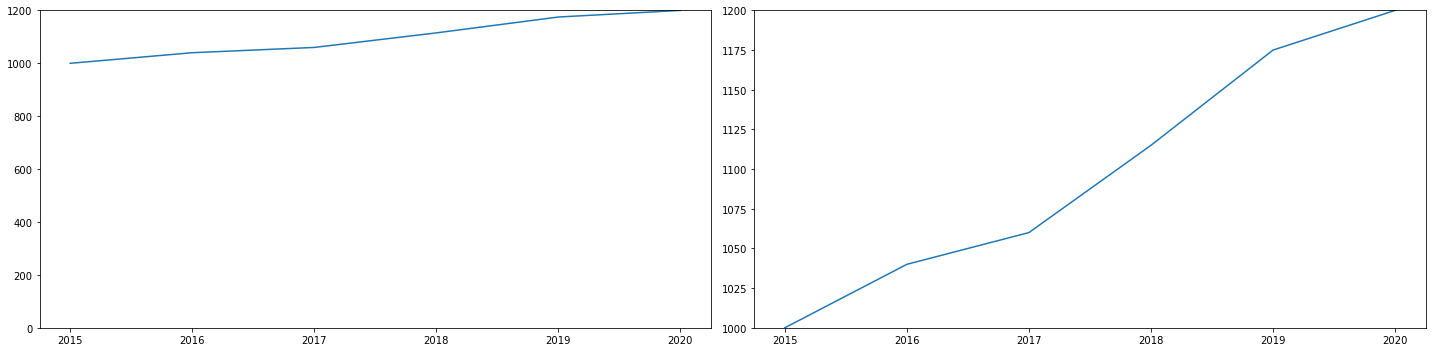

In [8]:
Ciro = [1000,1040,1060,1115,1175,1200]
Yıllar = list(range(2015,2021))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

axes[0].plot(Yıllar, Ciro)
axes[0].set_ylim([0, 1200])

axes[1].plot(Yıllar, Ciro)
axes[1].set_ylim([1000, 1200])

fig.tight_layout()